### Question 1

In [1]:
!docker version

Client:
 Cloud integration: v1.0.35+desktop.5
 Version:           24.0.6
 API version:       1.43
 Go version:        go1.20.7
 Git commit:        ed223bc
 Built:             Mon Sep  4 12:32:48 2023
 OS/Arch:           windows/amd64
 Context:           default

Server: Docker Desktop 4.25.2 (129061)
 Engine:
  Version:          24.0.6
  API version:      1.43 (minimum version 1.12)
  Go version:       go1.20.7
  Git commit:       1a79695
  Built:            Mon Sep  4 12:32:16 2023
  OS/Arch:          linux/amd64
  Experimental:     false
 containerd:
  Version:          1.6.22
  GitCommit:        8165feabfdfe38c65b599c4993d227328c231fca
 runc:
  Version:          1.1.8
  GitCommit:        v1.1.8-0-g82f18fe
 docker-init:
  Version:          0.19.0
  GitCommit:        de40ad0


In [2]:
!docker pull svizor/zoomcamp-model:hw10

hw10: Pulling from svizor/zoomcamp-model


What's Next?
  View a summary of image vulnerabilities and recommendations â†’ docker scout quickview svizor/zoomcamp-model:hw10



Digest: sha256:1f02558d1aa1c26ebc2660d736e650cb93578af1f630c6d229325df4618d51a6
Status: Image is up to date for svizor/zoomcamp-model:hw10
docker.io/svizor/zoomcamp-model:hw10


In [3]:
#!docker run -it --rm -p 9696:9696 svizor/zoomcamp-model:hw10

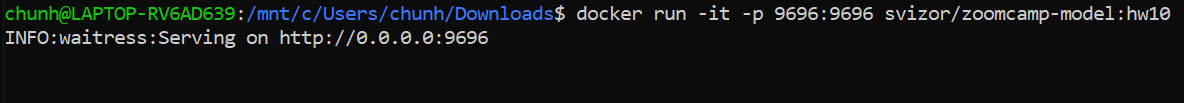

In [4]:
!python q6_test.py

{'get_credit': True, 'get_credit_probability': 0.726936946355423}


### Question 2

In [5]:
!kind --version

kind version 0.20.0


In [6]:
!kind create cluster

ERROR: failed to create cluster: node(s) already exist for a cluster with the name "kind"


In [7]:
!kubectl cluster-info

Kubernetes control plane is running at https://127.0.0.1:64499
CoreDNS is running at https://127.0.0.1:64499/api/v1/namespaces/kube-system/services/kube-dns:dns/proxy

To further debug and diagnose cluster problems, use 'kubectl cluster-info dump'.


### Question 3

In [8]:
!kubectl get services

NAME             TYPE           CLUSTER-IP    EXTERNAL-IP   PORT(S)        AGE
credit-service   LoadBalancer   10.96.55.31   <pending>     80:31887/TCP   110m
kubernetes       ClusterIP      10.96.0.1     <none>        443/TCP        166m


### Question 4

To be able to use the docker image we previously created (zoomcamp-model:hw10), we need to register it with kind.

What's the command we need to run for that?

kind load docker-image

### Question 5

In [9]:
!kubectl apply -f deployment.yaml

deployment.apps/credit configured


In [10]:
!kubectl get pods

NAME                      READY   STATUS             RESTARTS   AGE
credit-65ccb78b69-mx8b9   0/1     ImagePullBackOff   0          111m
credit-855d87bb9c-qnxww   0/1     Pending            0          0s


### Question 6

In [11]:
!kubectl apply -f service.yaml

service/credit-service unchanged


In [12]:
!kubectl get services

NAME             TYPE           CLUSTER-IP    EXTERNAL-IP   PORT(S)        AGE
credit-service   LoadBalancer   10.96.55.31   <pending>     80:31887/TCP   110m
kubernetes       ClusterIP      10.96.0.1     <none>        443/TCP        166m


In [13]:
!kubectl port-forward service/credit-service 9696:80

error: unable to forward port because pod is not running. Current status=Pending


In [14]:
!kubectl delete hpa credit-hpa
!kubectl autoscale deployment credit --name credit-hpa --cpu-percent=20 --min=1 --max=3

horizontalpodautoscaler.autoscaling "credit-hpa" deleted
horizontalpodautoscaler.autoscaling/credit-hpa autoscaled


In [15]:
!kubectl get hpa

NAME         REFERENCE           TARGETS         MINPODS   MAXPODS   REPLICAS   AGE
credit-hpa   Deployment/credit   <unknown>/20%   1         3         0          0s
